The dataset was downloaded from the 'Inside Airbnb' website, from the city of Melbourne, in Victoria, Australia, and contains information about Airbnb listings.


# Libraries

In [183]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Uploading and understanding the dataset

In [184]:
df = pd.read_csv('/content/listings.csv', engine='python', on_bad_lines='skip')

In [185]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10803,https://www.airbnb.com/rooms/10803,20230606220121,2023-06-07,city scrape,Rental unit in Brunswick East · ★4.49 · 1 bedr...,A large air conditioned room with firm queen s...,This hip area is a crossroads between two grea...,https://a0.muscache.com/pictures/e5f30dd1-ac57...,38901,...,4.69,4.65,4.60,NaN,f,1,0,1,0,1.35
1,12936,https://www.airbnb.com/rooms/12936,20230606220121,2023-06-07,previous scrape,Rental unit in St Kilda · ★4.68 · 1 bedroom · ...,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,https://a0.muscache.com/pictures/59701/2e8cdaf...,50121,...,4.83,4.78,4.66,NaN,f,10,10,0,0,0.27
2,41836,https://www.airbnb.com/rooms/41836,20230606220121,2023-06-07,previous scrape,Home in Reservoir · ★4.71 · 1 bedroom · 1 bed ...,Easy to travel from and to the Airport; quiet ...,"The neighbours are quiet and friendly, please...",https://a0.muscache.com/pictures/569696dd-1ad0...,182833,...,4.83,4.39,4.69,NaN,f,2,0,2,0,1.04
3,43429,https://www.airbnb.com/rooms/43429,20230606220121,2023-06-07,city scrape,Rental unit in Oakleigh East · ★4.87 · 1 bedro...,SPECIAL NOTICE - We are excited to announce bu...,Oakleigh is one of the most convenient and div...,https://a0.muscache.com/pictures/8c6284de-36de...,189684,...,4.93,4.79,4.86,NaN,f,3,3,0,0,1.61
4,38271,https://www.airbnb.com/rooms/38271,20230606220121,2023-06-07,city scrape,Rental unit in Berwick · ★4.86 · 3 bedrooms · ...,After hosting many guests from all over the wo...,Our street is quiet & secluded but within walk...,https://a0.muscache.com/pictures/1182791/3bf4b...,164193,...,4.93,4.90,4.87,NaN,f,1,1,0,0,1.44


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22253 entries, 0 to 22252
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            22253 non-null  int64  
 1   listing_url                                   22253 non-null  object 
 2   scrape_id                                     22253 non-null  int64  
 3   last_scraped                                  22253 non-null  object 
 4   source                                        22253 non-null  object 
 5   name                                          22253 non-null  object 
 6   description                                   21893 non-null  object 
 7   neighborhood_overview                         12810 non-null  object 
 8   picture_url                                   22253 non-null  object 
 9   host_id                                       22253 non-null 

In [187]:
df.last_scraped.value_counts()

2023-06-07    22253
Name: last_scraped, dtype: int64

In [188]:
df.amenities[0]

'["Cooking basics", "Security cameras on property", "Bathtub", "Wifi \\u2013 24 Mbps", "Radiant heating", "Luggage dropoff allowed", "Dishes and silverware", "Kitchen", "Freezer", "Body soap", "Carbon monoxide alarm", "Shampoo", "Drying rack for clothing", "Microwave", "Hot water", "Chef oven", "Outdoor dining area", "Clothing storage: wardrobe", "Bed linens", "Stove", "Hangers", "Iron", "Portable fans", "Room-darkening shades", "Wine glasses", "Books and reading material", "Free washer \\u2013 In unit", "27\\" HDTV with Netflix", "Toaster", "Hair dryer", "Smoke alarm", "Blender", "Self check-in", "Conditioner", "Barbecue utensils", "First aid kit", "Dedicated workspace", "Portable air conditioning", "Ethernet connection", "Dining table", "Shower gel", "Lock on bedroom door", "Bikes", "Shared backyard \\u2013 Fully fenced", "Laundromat nearby", "Pets allowed", "Extra pillows and blankets", "Keypad", "Baking sheet", "Fire extinguisher", "Cleaning products", "Refrigerator", "Hot water ke

In [189]:
unique_columns = ['id', 'listing_url', 'scrape_id', 'name', 'description', 'neighborhood_overview', 'picture_url']

for col in unique_columns:
  print(df[col].shape, df[col].nunique())

(22253,) 22253
(22253,) 22253
(22253,) 1
(22253,) 16204
(22253,) 20503
(22253,) 10796
(22253,) 21726



The dataset contains 22.253 entries of Airbnb listings scraped from the Airbnb website in june, 2023. There are 75 features.

1.   4 features contain only nulls (neighbourhood_group_cleansed, bathrooms, calendar_updated and license)
2.   Some features are supposed to be unique values, so they won't be providing relevant information for this analysis (id, listing_url, scrape_id, name, description, neighborhood_overview, picture_url)
3. There are 22 features about the host
4. There are 3 features about the neighbourhood and features for latitude and longitude
5. There are 15 features with information from the calendar, which shows future bookings (so there is no information from the past)
6. There are 13 features about reviews
7. The 'amenities' feature has objects that contain a list of all the amenities a listing has. I decided not to work with this for now, as it would be needed to make more transformations for just this feature.




# Creating a dataframe for a first analysis

In [190]:
df.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
   

In [191]:
columns_to_keep = ['host_is_superhost', 'neighbourhood_cleansed',
                   'property_type', 'room_type', 'accommodates',
                   'bathrooms_text', 'bedrooms', 'beds', 'minimum_nights',
                   'price', 'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
                   'review_scores_accuracy', 'review_scores_cleanliness',
                   'review_scores_checkin', 'review_scores_communication',
                   'review_scores_location', 'review_scores_value', 'reviews_per_month']

df_sum = df[columns_to_keep]

df_sum.columns = [col.strip() for col in df_sum.columns]
df_sum

,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,price,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,NaN,Moreland,Private room in rental unit,Private room,2,1 shared bath,NaN,1.0,7,$44.00,171,25,4.49,4.64,3.98,4.72,4.69,4.65,4.60,1.35
1,f,Port Phillip,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,3,$95.00,42,0,4.68,4.78,4.71,4.83,4.83,4.78,4.66,0.27
2,NaN,Darebin,Private room in home,Private room,2,1 shared bath,NaN,1.0,7,$40.00,159,0,4.71,4.68,4.65,4.89,4.83,4.39,4.69,1.04
3,t,Monash,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,2,$118.00,245,20,4.87,4.91,4.93,4.94,4.93,4.79,4.86,1.61
4,t,Casey,Entire rental unit,Entire home/apt,5,1 bath,3.0,3.0,1,$117.00,220,35,4.86,4.92,4.98,4.91,4.93,4.90,4.87,1.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22248,f,Glen Eira,Entire rental unit,Entire home/apt,4,1 bath,2.0,3.0,3,$182.00,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22249,f,Moonee Valley,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,3,$70.00,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22250,f,Melbourne,Entire townhouse,Entire home/apt,4,1 bath,3.0,3.0,4,$451.00,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22251,t,Melbourne,Entire rental unit,Entire home/apt,4,2 baths,2.0,2.0,1,$174.00,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
df_sum = df_sum.assign(price = lambda x: x.price.apply(lambda value: float(value.replace("$", "").replace(",", ""))))

In [193]:
df_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22253 entries, 0 to 22252
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            16925 non-null  object 
 1   neighbourhood_cleansed       22253 non-null  object 
 2   property_type                22253 non-null  object 
 3   room_type                    22253 non-null  object 
 4   accommodates                 22253 non-null  int64  
 5   bathrooms_text               22240 non-null  object 
 6   bedrooms                     16185 non-null  float64
 7   beds                         22054 non-null  float64
 8   minimum_nights               22253 non-null  int64  
 9   price                        22253 non-null  float64
 10  number_of_reviews            22253 non-null  int64  
 11  number_of_reviews_ltm        22253 non-null  int64  
 12  review_scores_rating         17909 non-null  float64
 13  review_scores_ac

# Inspecting and cleaning

## Nulls

In [194]:
((df_sum.isnull().sum() / df_sum.shape[0]) * 100).round(2)

host_is_superhost              23.94
neighbourhood_cleansed          0.00
property_type                   0.00
room_type                       0.00
accommodates                    0.00
bathrooms_text                  0.06
bedrooms                       27.27
beds                            0.89
minimum_nights                  0.00
price                           0.00
number_of_reviews               0.00
number_of_reviews_ltm           0.00
review_scores_rating           19.52
review_scores_accuracy         20.64
review_scores_cleanliness      20.63
review_scores_checkin          20.66
review_scores_communication    20.63
review_scores_location         20.65
review_scores_value            20.65
reviews_per_month              19.52
dtype: float64

<Axes: >

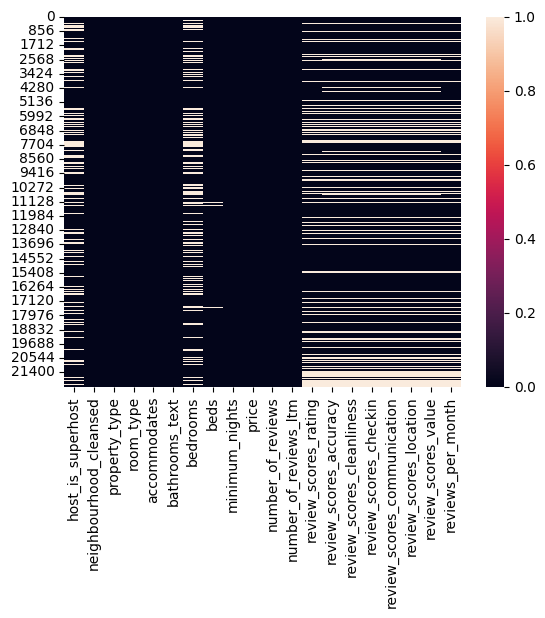

In [195]:
sns.heatmap(df_sum.isnull())

In [196]:
df_sum.host_is_superhost.value_counts()

f    12510
t     4415
Name: host_is_superhost, dtype: int64

In [197]:
df_sum[df_sum.host_is_superhost.isna()]

,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,price,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,NaN,Moreland,Private room in rental unit,Private room,2,1 shared bath,NaN,1.0,7,44.0,171,25,4.49,4.64,3.98,4.72,4.69,4.65,4.60,1.35
2,NaN,Darebin,Private room in home,Private room,2,1 shared bath,NaN,1.0,7,40.0,159,0,4.71,4.68,4.65,4.89,4.83,4.39,4.69,1.04
5,NaN,Port Phillip,Private room in condo,Private room,2,1 shared bath,NaN,1.0,1,88.0,53,8,4.74,4.55,4.86,4.95,4.95,4.82,4.71,0.34
7,NaN,Boroondara,Private room in rental unit,Private room,1,1 shared bath,NaN,1.0,2,50.0,217,27,4.82,4.88,4.93,4.91,4.92,4.78,4.86,1.45
10,NaN,Greater Dandenong,Private room in home,Private room,1,3 baths,NaN,3.0,1,80.0,1,0,1.00,2.00,2.00,3.00,2.00,4.00,1.00,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22148,NaN,Melbourne,Private room in rental unit,Private room,1,1 bath,1.0,1.0,4,100.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22158,NaN,Boroondara,Private room in home,Private room,1,1 shared bath,1.0,1.0,1,44.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22180,NaN,Casey,Entire home,Entire home/apt,2,1 bath,1.0,1.0,1,237.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22228,NaN,Greater Dandenong,Private room in home,Private room,2,1 bath,1.0,1.0,1,65.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
df_sum.bedrooms.value_counts()

1.0     6240
2.0     6233
3.0     2311
4.0      980
5.0      276
6.0       88
7.0       33
8.0        6
9.0        4
10.0       4
14.0       4
11.0       3
22.0       2
15.0       1
Name: bedrooms, dtype: int64

In [199]:
df_bedrooms_check = df_sum[df_sum.bedrooms.isna()]
df_bedrooms_check.shape

(6068, 20)

In [200]:
df_bedrooms_check.room_type.value_counts()

Private room       5238
Entire home/apt     556
Shared room         266
Hotel room            8
Name: room_type, dtype: int64

In [201]:
(5238 + 266 + 8) / 6068

0.9083717864205669

In [202]:
df_bedrooms_check.loc[df_bedrooms_check['room_type'] == 'Entire home/apt']

,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,price,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
140,f,Port Phillip,Entire rental unit,Entire home/apt,2,1 bath,NaN,1.0,1,99.0,173,0,4.86,4.93,4.80,4.93,4.95,4.91,4.84,1.42
210,t,Melbourne,Entire loft,Entire home/apt,2,1 bath,NaN,1.0,2,173.0,147,42,4.87,4.87,4.86,4.93,4.91,4.97,4.77,1.26
215,f,Melbourne,Entire rental unit,Entire home/apt,2,1 bath,NaN,1.0,1,117.0,297,18,4.61,4.79,4.63,4.89,4.93,4.92,4.73,2.56
274,f,Melbourne,Entire rental unit,Entire home/apt,2,1 bath,NaN,1.0,5,159.0,81,13,4.35,4.39,4.53,4.77,4.70,4.82,4.35,0.71
277,f,Port Phillip,Entire guest suite,Entire home/apt,4,1 bath,NaN,1.0,2,145.0,1,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21698,f,Moreland,Entire rental unit,Entire home/apt,2,1 bath,NaN,1.0,2,101.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21946,f,Melbourne,Entire rental unit,Entire home/apt,2,1 bath,NaN,1.0,6,229.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21957,f,Port Phillip,Entire rental unit,Entire home/apt,2,1 bath,NaN,1.0,3,98.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22192,f,Melbourne,Entire rental unit,Entire home/apt,2,1 bath,NaN,NaN,2,153.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


91% of the missing values for
 'bedroom' are missing because the 'room type' is either a private room, a shared room or a hotel room. <br>
In 9% of the cases it's an entire home/apt and therefore could be considered a real null.

In [203]:
((df_sum.isnull().sum() / df_sum.shape[0]) * 100).round(2)

host_is_superhost              23.94
neighbourhood_cleansed          0.00
property_type                   0.00
room_type                       0.00
accommodates                    0.00
bathrooms_text                  0.06
bedrooms                       27.27
beds                            0.89
minimum_nights                  0.00
price                           0.00
number_of_reviews               0.00
number_of_reviews_ltm           0.00
review_scores_rating           19.52
review_scores_accuracy         20.64
review_scores_cleanliness      20.63
review_scores_checkin          20.66
review_scores_communication    20.63
review_scores_location         20.65
review_scores_value            20.65
reviews_per_month              19.52
dtype: float64

In [204]:
df_sum.loc[df_sum['room_type'] == 'Entire home/apt', 'bedrooms'] = df_sum.loc[df_sum['room_type'] == 'Entire home/apt', 'bedrooms'].fillna(0)

In [205]:
df_sum.bedrooms.value_counts()

1.0     6240
2.0     6233
3.0     2311
4.0      980
0.0      556
5.0      276
6.0       88
7.0       33
8.0        6
9.0        4
10.0       4
14.0       4
11.0       3
22.0       2
15.0       1
Name: bedrooms, dtype: int64

In [206]:
df_bedrooms_check_2 = df_sum[df_sum.bedrooms.isna()]

In [207]:
df_bedrooms_check_2.room_type.value_counts()

Private room    5238
Shared room      266
Hotel room         8
Name: room_type, dtype: int64

In [208]:
df_sum = df_sum.dropna(subset=['bathrooms_text', 'beds'], how='any')

In [209]:
((df_sum.isnull().sum() / df_sum.shape[0]) * 100).round(2)

host_is_superhost              23.68
neighbourhood_cleansed          0.00
property_type                   0.00
room_type                       0.00
accommodates                    0.00
bathrooms_text                  0.00
bedrooms                       24.47
beds                            0.00
minimum_nights                  0.00
price                           0.00
number_of_reviews               0.00
number_of_reviews_ltm           0.00
review_scores_rating           19.37
review_scores_accuracy         20.49
review_scores_cleanliness      20.47
review_scores_checkin          20.50
review_scores_communication    20.47
review_scores_location         20.50
review_scores_value            20.50
reviews_per_month              19.37
dtype: float64

In [210]:
simp = SimpleImputer(strategy='most_frequent')
his = simp.fit_transform(df_sum['host_is_superhost'].values.reshape(-1,1))

In [211]:
knn = KNNImputer()
col_list = ['bedrooms', 'review_scores_rating', 'review_scores_accuracy',
            'review_scores_cleanliness', 'review_scores_checkin',
            'review_scores_communication', 'review_scores_location',
            'review_scores_value', 'reviews_per_month' ]
for col in col_list:

  df_sum[f'{col}_t'] = knn.fit_transform(df_sum[col].values.reshape(-1, 1))

In [212]:
df_sum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22044 entries, 0 to 22252
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   host_is_superhost              16824 non-null  object 
 1   neighbourhood_cleansed         22044 non-null  object 
 2   property_type                  22044 non-null  object 
 3   room_type                      22044 non-null  object 
 4   accommodates                   22044 non-null  int64  
 5   bathrooms_text                 22044 non-null  object 
 6   bedrooms                       16649 non-null  float64
 7   beds                           22044 non-null  float64
 8   minimum_nights                 22044 non-null  int64  
 9   price                          22044 non-null  float64
 10  number_of_reviews              22044 non-null  int64  
 11  number_of_reviews_ltm          22044 non-null  int64  
 12  review_scores_rating           17775 non-null 

In [213]:
df_nonulls = (
    df_sum
    .assign(host_is_super=his)
    .drop(['bedrooms', 'review_scores_rating', 'review_scores_accuracy',
            'review_scores_cleanliness', 'review_scores_checkin',
            'review_scores_communication', 'review_scores_location',
            'review_scores_value', 'reviews_per_month', 'host_is_superhost'], axis=1)
)

## Outliers

In [214]:
df_nonulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22044 entries, 0 to 22252
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   neighbourhood_cleansed         22044 non-null  object 
 1   property_type                  22044 non-null  object 
 2   room_type                      22044 non-null  object 
 3   accommodates                   22044 non-null  int64  
 4   bathrooms_text                 22044 non-null  object 
 5   beds                           22044 non-null  float64
 6   minimum_nights                 22044 non-null  int64  
 7   price                          22044 non-null  float64
 8   number_of_reviews              22044 non-null  int64  
 9   number_of_reviews_ltm          22044 non-null  int64  
 10  bedrooms_t                     22044 non-null  float64
 11  review_scores_rating_t         22044 non-null  float64
 12  review_scores_accuracy_t       22044 non-null 

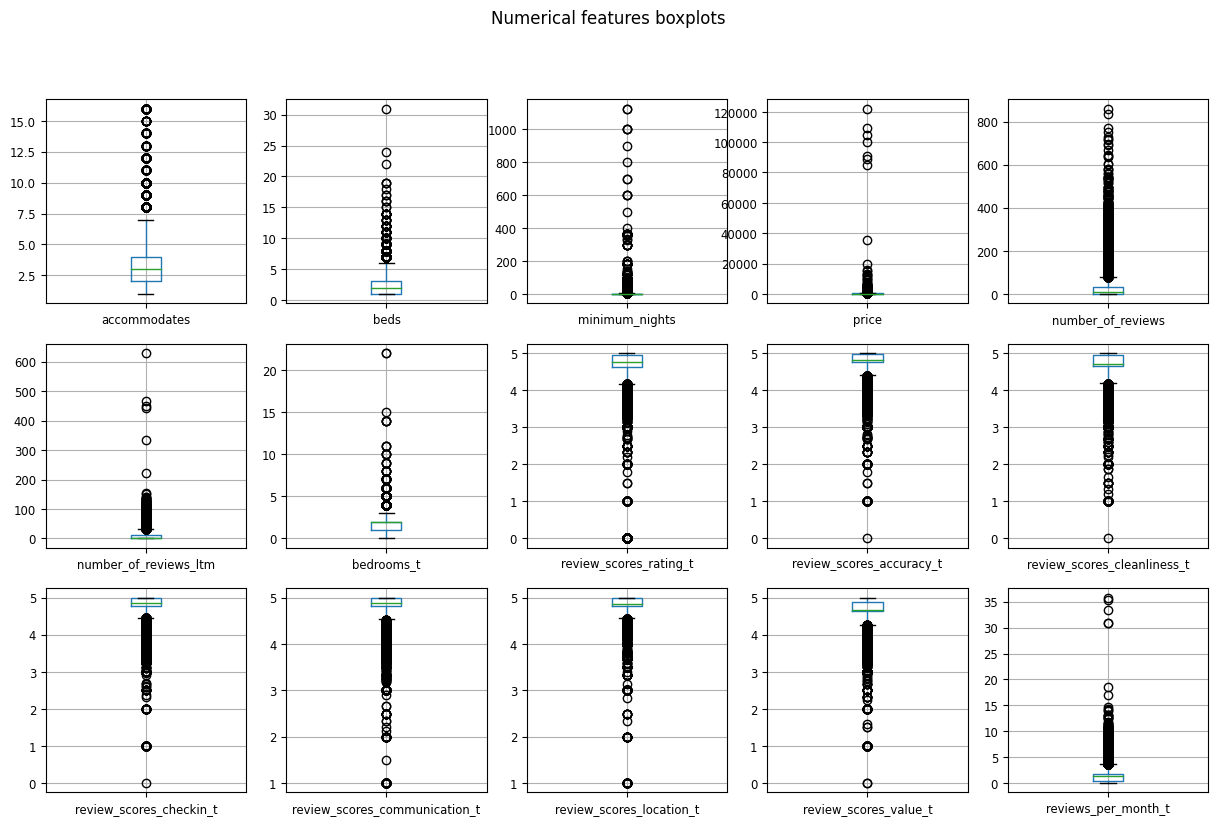

In [215]:
files = [df_nonulls[c] for c in df_nonulls._get_numeric_data().columns]
_, axarr = plt.subplots(3,5,figsize=(15,9), squeeze=True)
_.suptitle('Numerical features boxplots')
for data, ax in zip(files, axarr.flat):
  pd.DataFrame(data).boxplot(ax=ax, fontsize='small')

In [216]:
df_nonulls.describe().round(2)

,accommodates,beds,minimum_nights,price,number_of_reviews,number_of_reviews_ltm,bedrooms_t,review_scores_rating_t,review_scores_accuracy_t,review_scores_cleanliness_t,review_scores_checkin_t,review_scores_communication_t,review_scores_location_t,review_scores_value_t,reviews_per_month_t
count,22044.00,22044.00,22044.00,22044.00,22044.00,22044.00,22044.00,22044.00,22044.00,22044.00,22044.00,22044.00,22044.00,22044.00,22044.00
mean,3.65,2.11,5.18,253.32,30.89,9.95,1.91,4.64,4.75,4.66,4.78,4.81,4.82,4.65,1.40
std,2.34,1.56,27.88,1854.60,60.33,17.72,0.99,0.63,0.39,0.44,0.37,0.36,0.30,0.42,1.48
min,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.01
25%,2.00,1.00,1.00,97.00,1.00,0.00,1.00,4.64,4.75,4.64,4.78,4.81,4.82,4.64,0.38
50%,3.00,2.00,2.00,150.00,7.00,2.00,1.91,4.75,4.81,4.70,4.85,4.89,4.86,4.68,1.33
75%,4.00,3.00,3.00,238.00,32.00,13.00,2.00,4.95,4.98,4.94,5.00,5.00,5.00,4.89,1.67
max,16.00,31.00,1125.00,122165.00,861.00,629.00,22.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,35.77


In [217]:
df_sum[df_sum['price'] == 122165]

,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,price,...,reviews_per_month,bedrooms_t,review_scores_rating_t,review_scores_accuracy_t,review_scores_cleanliness_t,review_scores_checkin_t,review_scores_communication_t,review_scores_location_t,review_scores_value_t,reviews_per_month_t
20140,f,Moreland,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,3,122165.0,...,0.94,1.0,5.0,5.0,5.0,5.0,5.0,5.0,4.5,0.94


In [218]:
def detect_out(column):
  iqr = np.percentile(column, 75) - np.percentile(column, 25)
  lower_bound = np.percentile(column, 25) - iqr * 1.5
  upper_bound = np.percentile(column, 75) + iqr * 1.5

  ls_out = []

  for value in column:
    if value < lower_bound:
      ls_out.append(-1)
    elif value > upper_bound:
      ls_out.append(-1)
    else:
      ls_out.append(1)

  return np.array(ls_out)

In [219]:
df_analysis = (
    df_nonulls
    .assign(out_price = lambda x: detect_out(x.price))
    .query('out_price != -1')
    .drop('out_price', axis=1)
 )
df_analysis

,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,beds,minimum_nights,price,number_of_reviews,number_of_reviews_ltm,bedrooms_t,review_scores_rating_t,review_scores_accuracy_t,review_scores_cleanliness_t,review_scores_checkin_t,review_scores_communication_t,review_scores_location_t,review_scores_value_t,reviews_per_month_t,host_is_super
0,Moreland,Private room in rental unit,Private room,2,1 shared bath,1.0,7,44.0,171,25,1.913448,4.490000,4.640000,3.980000,4.720000,4.690000,4.65000,4.600000,1.350000,f
1,Port Phillip,Entire rental unit,Entire home/apt,2,1 bath,1.0,3,95.0,42,0,1.000000,4.680000,4.780000,4.710000,4.830000,4.830000,4.78000,4.660000,0.270000,f
2,Darebin,Private room in home,Private room,2,1 shared bath,1.0,7,40.0,159,0,1.913448,4.710000,4.680000,4.650000,4.890000,4.830000,4.39000,4.690000,1.040000,f
3,Monash,Entire rental unit,Entire home/apt,2,1 bath,1.0,2,118.0,245,20,1.000000,4.870000,4.910000,4.930000,4.940000,4.930000,4.79000,4.860000,1.610000,t
4,Casey,Entire rental unit,Entire home/apt,5,1 bath,3.0,1,117.0,220,35,3.000000,4.860000,4.920000,4.980000,4.910000,4.930000,4.90000,4.870000,1.440000,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22247,Port Phillip,Entire rental unit,Entire home/apt,4,1 bath,1.0,3,174.0,0,0,2.000000,4.638003,4.747195,4.657103,4.780282,4.810799,4.82176,4.654198,1.395903,f
22248,Glen Eira,Entire rental unit,Entire home/apt,4,1 bath,3.0,3,182.0,0,0,2.000000,4.638003,4.747195,4.657103,4.780282,4.810799,4.82176,4.654198,1.395903,f
22249,Moonee Valley,Entire rental unit,Entire home/apt,2,1 bath,1.0,3,70.0,0,0,1.000000,4.638003,4.747195,4.657103,4.780282,4.810799,4.82176,4.654198,1.395903,f
22251,Melbourne,Entire rental unit,Entire home/apt,4,2 baths,2.0,1,174.0,0,0,2.000000,4.638003,4.747195,4.657103,4.780282,4.810799,4.82176,4.654198,1.395903,t


In [220]:
df_analysis.corr().round(1)

<ipython-input-220-77263dddeeb7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_analysis.corr().round(1)


,accommodates,beds,minimum_nights,price,number_of_reviews,number_of_reviews_ltm,bedrooms_t,review_scores_rating_t,review_scores_accuracy_t,review_scores_cleanliness_t,review_scores_checkin_t,review_scores_communication_t,review_scores_location_t,review_scores_value_t,reviews_per_month_t
accommodates,1.0,0.8,-0.0,0.6,0.0,0.1,0.7,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.1
beds,0.8,1.0,0.0,0.5,0.0,0.0,0.7,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0
minimum_nights,-0.0,0.0,1.0,-0.0,-0.0,-0.1,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
price,0.6,0.5,-0.0,1.0,0.0,0.1,0.3,0.1,0.0,0.1,-0.0,0.0,0.1,-0.0,0.1
number_of_reviews,0.0,0.0,-0.0,0.0,1.0,0.7,-0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.5
number_of_reviews_ltm,0.1,0.0,-0.1,0.1,0.7,1.0,-0.1,0.1,0.1,0.1,0.0,0.1,0.1,0.1,0.8
bedrooms_t,0.7,0.7,-0.0,0.3,-0.1,-0.1,1.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.1
review_scores_rating_t,0.0,0.0,-0.0,0.1,0.1,0.1,0.0,1.0,0.6,0.5,0.5,0.5,0.4,0.5,0.2
review_scores_accuracy_t,-0.0,-0.0,-0.0,0.0,0.1,0.1,-0.0,0.6,1.0,0.8,0.7,0.7,0.6,0.8,0.1
review_scores_cleanliness_t,0.0,-0.0,-0.0,0.1,0.1,0.1,-0.0,0.5,0.8,1.0,0.6,0.6,0.5,0.7,0.1


# Predicting the price

## Pre Processing Categorical Features

In [221]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20291 entries, 0 to 22252
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   neighbourhood_cleansed         20291 non-null  object 
 1   property_type                  20291 non-null  object 
 2   room_type                      20291 non-null  object 
 3   accommodates                   20291 non-null  int64  
 4   bathrooms_text                 20291 non-null  object 
 5   beds                           20291 non-null  float64
 6   minimum_nights                 20291 non-null  int64  
 7   price                          20291 non-null  float64
 8   number_of_reviews              20291 non-null  int64  
 9   number_of_reviews_ltm          20291 non-null  int64  
 10  bedrooms_t                     20291 non-null  float64
 11  review_scores_rating_t         20291 non-null  float64
 12  review_scores_accuracy_t       20291 non-null 

In [222]:
ohe = OneHotEncoder(sparse_output=False)

#nei_t = pd.DataFrame(ohe.fit_transform(df_analysis.neighbourhood_cleansed.values.reshape(-1,1)), columns=ohe.get_feature_names_out())
#pt_t = pd.DataFrame(ohe.fit_transform(df_analysis.property_type.values.reshape(-1,1)), columns=ohe.get_feature_names_out())
rt_t = pd.DataFrame(ohe.fit_transform(df_analysis.room_type.values.reshape(-1,1)), columns=ohe.get_feature_names_out())
#bt_t = pd.DataFrame(ohe.fit_transform(df_analysis.bathrooms_text.values.reshape(-1,1)), columns=ohe.get_feature_names_out())
his_t = pd.DataFrame(ohe.fit_transform(df_analysis.host_is_super.values.reshape(-1,1)), columns=ohe.get_feature_names_out())

In [223]:
df_ready = (
    df_analysis
    #.merge(nei_t, left_index=True, right_index=True)
    #.merge(pt_t, left_index=True, right_index=True)
    .merge(rt_t, left_index=True, right_index=True)
    #.merge(bt_t, left_index=True, right_index=True)
    .merge(his_t, left_index=True, right_index=True)
    .drop(['neighbourhood_cleansed', 'property_type', 'room_type',
           'bathrooms_text', 'host_is_super', 'minimum_nights'], axis=1))

df_ready.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18434 entries, 0 to 20290
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   accommodates                   18434 non-null  int64  
 1   beds                           18434 non-null  float64
 2   price                          18434 non-null  float64
 3   number_of_reviews              18434 non-null  int64  
 4   number_of_reviews_ltm          18434 non-null  int64  
 5   bedrooms_t                     18434 non-null  float64
 6   review_scores_rating_t         18434 non-null  float64
 7   review_scores_accuracy_t       18434 non-null  float64
 8   review_scores_cleanliness_t    18434 non-null  float64
 9   review_scores_checkin_t        18434 non-null  float64
 10  review_scores_communication_t  18434 non-null  float64
 11  review_scores_location_t       18434 non-null  float64
 12  review_scores_value_t          18434 non-null 

In [224]:
check = df_ready.corr().round(2)
check.loc[check['price'] >= 0.1]

,accommodates,beds,price,number_of_reviews,number_of_reviews_ltm,bedrooms_t,review_scores_rating_t,review_scores_accuracy_t,review_scores_cleanliness_t,review_scores_checkin_t,review_scores_communication_t,review_scores_location_t,review_scores_value_t,reviews_per_month_t,x0_Entire home/apt,x0_Hotel room,x0_Private room,x0_Shared room,x0_f,x0_t
accommodates,1.00,0.85,0.59,0.06,0.11,0.64,0.04,-0.00,0.00,-0.01,0.01,0.01,-0.01,0.10,0.02,-0.01,-0.02,0.00,-0.01,0.01
beds,0.85,1.00,0.50,0.02,0.06,0.66,0.02,-0.01,-0.01,0.01,0.01,-0.01,-0.01,0.05,0.02,-0.01,-0.02,-0.00,-0.01,0.01
price,0.59,0.50,1.00,0.04,0.10,0.33,0.09,0.04,0.08,-0.00,0.02,0.07,-0.01,0.10,0.04,-0.02,-0.04,-0.02,-0.02,0.02
number_of_reviews_ltm,0.11,0.06,0.10,0.65,1.00,-0.07,0.12,0.09,0.11,0.05,0.08,0.08,0.09,0.81,0.04,-0.02,-0.04,-0.01,-0.04,0.04
bedrooms_t,0.64,0.66,0.33,-0.10,-0.07,1.00,0.00,-0.00,-0.01,0.03,0.02,-0.04,0.01,-0.06,0.00,-0.00,-0.00,-0.00,0.00,-0.00
reviews_per_month_t,0.10,0.05,0.10,0.52,0.81,-0.06,0.15,0.11,0.13,0.04,0.09,0.09,0.10,1.00,0.06,-0.02,-0.05,-0.01,-0.01,0.01


## Splitting the dataset for hold out validation

In [225]:
x = df_ready.drop('price', axis=1)
y = df_ready.price

In [226]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Pre Processing Numerical Features

In [227]:
num_f = ['accommodates', 'beds', 'number_of_reviews_ltm', 'bedrooms_t',
         'reviews_per_month_t', 'review_scores_rating_t', 'review_scores_accuracy_t',
         'review_scores_cleanliness_t', 'review_scores_checkin_t', 'review_scores_communication_t',
         'review_scores_location_t', 'review_scores_value_t']

In [228]:
mms = MinMaxScaler()

for x, fea in enumerate(num_f):
  mms.fit(x_train[fea].values.reshape(-1,1))
  x_train[f'{fea}_scaled'] = mms.transform(x_train[fea].values.reshape(-1,1))
  x_test[f'{fea}_scaled'] = mms.transform(x_test[fea].values.reshape(-1,1))

In [229]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14747 entries, 6442 to 17372
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   accommodates                          14747 non-null  int64  
 1   beds                                  14747 non-null  float64
 2   number_of_reviews                     14747 non-null  int64  
 3   number_of_reviews_ltm                 14747 non-null  int64  
 4   bedrooms_t                            14747 non-null  float64
 5   review_scores_rating_t                14747 non-null  float64
 6   review_scores_accuracy_t              14747 non-null  float64
 7   review_scores_cleanliness_t           14747 non-null  float64
 8   review_scores_checkin_t               14747 non-null  float64
 9   review_scores_communication_t         14747 non-null  float64
 10  review_scores_location_t              14747 non-null  float64
 11  review_score

In [230]:
x_train = x_train.drop(num_f, axis=1)

In [231]:
x_test = x_test.drop(num_f, axis=1)

In [232]:
mms.fit(y_train.values.reshape(-1, 1))

y_train = mms.transform(y_train.values.reshape(-1, 1))
y_test = mms.transform(y_test.values.reshape(-1, 1))

# Testing a Linear Regression

In [233]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [234]:
y_pred = lr.predict(x_test)

In [235]:
r2 = r2_score(y_test, y_pred)
round(r2, 2)

0.38

In [236]:
mae = mean_absolute_error(y_test, y_pred)
round(mae, 2)

0.12

In [237]:
mse = mean_squared_error(y_test, y_pred)
round(mse, 2)

0.03

In [238]:
lr.coef_

array([[-1.33144430e-04,  2.09790297e-02, -2.13082902e-02,
         1.50360064e-02, -1.47067459e-02, -2.86060988e-03,
         2.86060988e-03,  8.88537205e-01,  9.07202040e-02,
         3.41671535e-01, -3.91292888e-01, -3.50544603e-02,
         1.00929657e-01,  8.18511307e-02,  3.53974558e-01,
        -1.25833583e-01, -9.43063586e-02,  2.83232977e-01,
        -4.44090753e-01]])

In [239]:
x_train.columns

Index(['number_of_reviews', 'x0_Entire home/apt', 'x0_Hotel room',
       'x0_Private room', 'x0_Shared room', 'x0_f', 'x0_t',
       'accommodates_scaled', 'beds_scaled', 'number_of_reviews_ltm_scaled',
       'bedrooms_t_scaled', 'reviews_per_month_t_scaled',
       'review_scores_rating_t_scaled', 'review_scores_accuracy_t_scaled',
       'review_scores_cleanliness_t_scaled', 'review_scores_checkin_t_scaled',
       'review_scores_communication_t_scaled',
       'review_scores_location_t_scaled', 'review_scores_value_t_scaled'],
      dtype='object')

## Testing a Decision Tree Regression

In [240]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20291 entries, 0 to 22252
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   neighbourhood_cleansed         20291 non-null  object 
 1   property_type                  20291 non-null  object 
 2   room_type                      20291 non-null  object 
 3   accommodates                   20291 non-null  int64  
 4   bathrooms_text                 20291 non-null  object 
 5   beds                           20291 non-null  float64
 6   minimum_nights                 20291 non-null  int64  
 7   price                          20291 non-null  float64
 8   number_of_reviews              20291 non-null  int64  
 9   number_of_reviews_ltm          20291 non-null  int64  
 10  bedrooms_t                     20291 non-null  float64
 11  review_scores_rating_t         20291 non-null  float64
 12  review_scores_accuracy_t       20291 non-null 

In [241]:
le = LabelEncoder()

In [242]:
le_fea = ['neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'host_is_super']

In [243]:
for fea in le_fea:
  df_analysis[fea] = le.fit_transform(df_analysis[fea])

In [244]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20291 entries, 0 to 22252
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   neighbourhood_cleansed         20291 non-null  int64  
 1   property_type                  20291 non-null  int64  
 2   room_type                      20291 non-null  int64  
 3   accommodates                   20291 non-null  int64  
 4   bathrooms_text                 20291 non-null  int64  
 5   beds                           20291 non-null  float64
 6   minimum_nights                 20291 non-null  int64  
 7   price                          20291 non-null  float64
 8   number_of_reviews              20291 non-null  int64  
 9   number_of_reviews_ltm          20291 non-null  int64  
 10  bedrooms_t                     20291 non-null  float64
 11  review_scores_rating_t         20291 non-null  float64
 12  review_scores_accuracy_t       20291 non-null 

In [245]:
x_tree = df_analysis.drop('price', axis=1)
y_tree = df_analysis.price

In [246]:
x_train, x_test, y_train, y_test = train_test_split(x_tree, y_tree, test_size=0.2, random_state=42)

In [247]:
dtr = DecisionTreeRegressor(max_depth=4)
dtr.fit(x_train, y_train)
y_pred = dtr.predict(x_test)

In [248]:
y_pred = pd.Series(y_pred).apply(lambda x: round(x))

In [249]:
r2 = r2_score(y_test, y_pred)
round(r2, 2)

0.47

In [250]:
mae = mean_absolute_error(y_test, y_pred)
round(mae, 2)

48.64

In [251]:
mse = mean_squared_error(y_test, y_pred)
round(mse, 2)

4271.03

# Testing a Random Forest Regression

In [252]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [253]:
y_pred = rfr.predict(x_test)

In [254]:
round(r2_score(y_test, y_pred), 2)

0.56

In [255]:
round(mean_absolute_error(y_test, y_pred), 2)

43.09

In [256]:
round(mean_squared_error(y_test, y_pred), 2)

3500.65

In [257]:
y_train.describe()

count    16232.000000
mean       160.402353
std         91.741271
min          0.000000
25%         90.000000
50%        144.000000
75%        207.000000
max        449.000000
Name: price, dtype: float64

<BarContainer object of 19 artists>

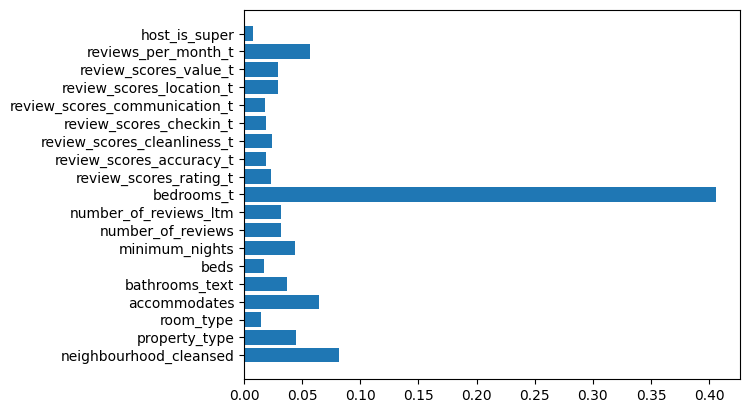

In [258]:
plt.barh(list(x_train.columns), rfr.feature_importances_)

# Conclusion for price prediction

*   In an effort to predict the price of a listing, the Random Forest Regressor provided the best result - 56% of the price can be explained by the model
*   The number of bedrooms is the most important feature to the model
*   Further studies might include feature engineering (including treating 'amenities' and adding more categorical features), using feature selection models and using PCA for dimension reduction



# Predicting occupancy rate above 50%


## Creating a binary class for occupancy rate

In [259]:
# Selecting a Dataframe for classification models

df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20291 entries, 0 to 22252
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   neighbourhood_cleansed         20291 non-null  int64  
 1   property_type                  20291 non-null  int64  
 2   room_type                      20291 non-null  int64  
 3   accommodates                   20291 non-null  int64  
 4   bathrooms_text                 20291 non-null  int64  
 5   beds                           20291 non-null  float64
 6   minimum_nights                 20291 non-null  int64  
 7   price                          20291 non-null  float64
 8   number_of_reviews              20291 non-null  int64  
 9   number_of_reviews_ltm          20291 non-null  int64  
 10  bedrooms_t                     20291 non-null  float64
 11  review_scores_rating_t         20291 non-null  float64
 12  review_scores_accuracy_t       20291 non-null 

In [260]:
# Calculating the occupancy rate

df_analysis['occ_rate'] = round((df_analysis.minimum_nights * df_analysis.number_of_reviews_ltm) / 365, 2)

In [261]:
# Creating a binary feature to define occupancy above 50%

df_analysis['occ_rate_bin'] = df_analysis['occ_rate'].apply(lambda x: 1 if x > 0.50 else 0)

In [262]:
# Checking the balance

df_analysis.occ_rate_bin.value_counts()

0    20161
1      130
Name: occ_rate_bin, dtype: int64

The dataset is imbalanced

In [263]:
# Creating a dataframe for modelling

df_occ = df_analysis.drop('occ_rate', axis=1)

In [264]:
df_occ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20291 entries, 0 to 22252
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   neighbourhood_cleansed         20291 non-null  int64  
 1   property_type                  20291 non-null  int64  
 2   room_type                      20291 non-null  int64  
 3   accommodates                   20291 non-null  int64  
 4   bathrooms_text                 20291 non-null  int64  
 5   beds                           20291 non-null  float64
 6   minimum_nights                 20291 non-null  int64  
 7   price                          20291 non-null  float64
 8   number_of_reviews              20291 non-null  int64  
 9   number_of_reviews_ltm          20291 non-null  int64  
 10  bedrooms_t                     20291 non-null  float64
 11  review_scores_rating_t         20291 non-null  float64
 12  review_scores_accuracy_t       20291 non-null 

## Pre Processing Categorical Features for a Decision Tree Classifier

In [265]:
le = LabelEncoder()

In [266]:
le_fea = ['neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'host_is_super']

for fea in le_fea:
  df_occ[fea] = le.fit_transform(df_occ[fea])

In [267]:
# Splitting the dataset

x = df_occ.drop(['occ_rate_bin', 'minimum_nights', 'number_of_reviews_ltm', 'number_of_reviews', 'reviews_per_month_t'], axis=1)
y = df_occ.occ_rate_bin

In [268]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20291 entries, 0 to 22252
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   neighbourhood_cleansed         20291 non-null  int64  
 1   property_type                  20291 non-null  int64  
 2   room_type                      20291 non-null  int64  
 3   accommodates                   20291 non-null  int64  
 4   bathrooms_text                 20291 non-null  int64  
 5   beds                           20291 non-null  float64
 6   price                          20291 non-null  float64
 7   bedrooms_t                     20291 non-null  float64
 8   review_scores_rating_t         20291 non-null  float64
 9   review_scores_accuracy_t       20291 non-null  float64
 10  review_scores_cleanliness_t    20291 non-null  float64
 11  review_scores_checkin_t        20291 non-null  float64
 12  review_scores_communication_t  20291 non-null 

## Balancing the dataset with SMOTE

In [269]:
x_res, y_res = SMOTE(sampling_strategy='minority').fit_resample(x, y)

In [270]:
# Checking balance

pd.Series(y_res).value_counts(normalize=True)

0    0.5
1    0.5
Name: occ_rate_bin, dtype: float64

In [271]:
x_res.shape, y_res.shape

((40322, 16), (40322,))

## Predicting occupancy rate (above = 1 or below 50% = 0) with a Decision Tree Classifier

In [272]:
# Splitting for hold out validation

x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)

In [273]:
# Defining the model, training data and predicting the price

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

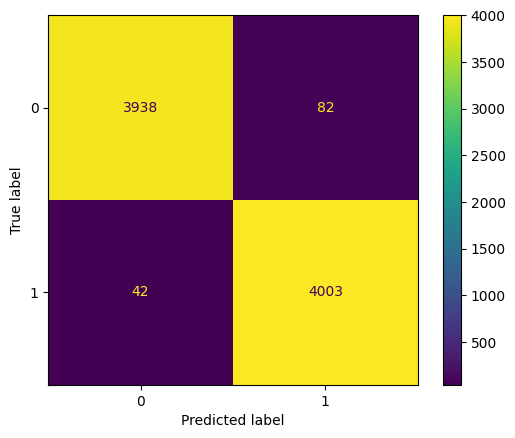

In [274]:
# Confusion Matrix

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [275]:
# Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4020
           1       0.98      0.99      0.98      4045

    accuracy                           0.98      8065
   macro avg       0.98      0.98      0.98      8065
weighted avg       0.98      0.98      0.98      8065



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'neighbourhood_cleansed'),
  Text(1, 0, 'property_type'),
  Text(2, 0, 'room_type'),
  Text(3, 0, 'accommodates'),
  Text(4, 0, 'bathrooms_text'),
  Text(5, 0, 'beds'),
  Text(6, 0, 'price'),
  Text(7, 0, 'bedrooms_t'),
  Text(8, 0, 'review_scores_rating_t'),
  Text(9, 0, 'review_scores_accuracy_t'),
  Text(10, 0, 'review_scores_cleanliness_t'),
  Text(11, 0, 'review_scores_checkin_t'),
  Text(12, 0, 'review_scores_communication_t'),
  Text(13, 0, 'review_scores_location_t'),
  Text(14, 0, 'review_scores_value_t'),
  Text(15, 0, 'host_is_super')])

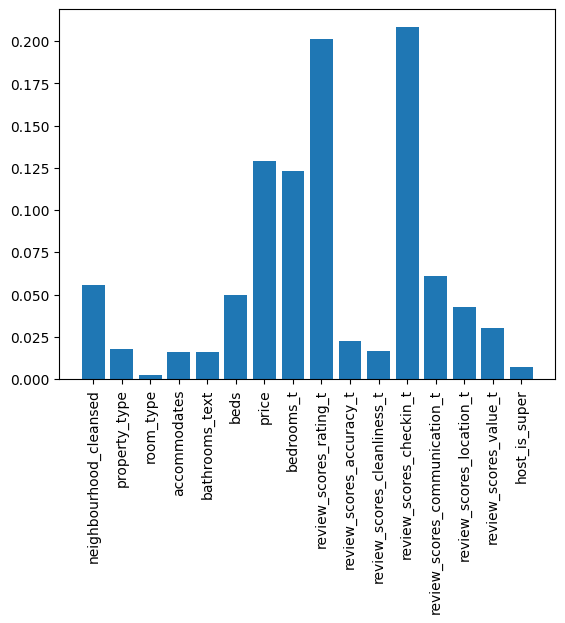

In [276]:
# Feature importances

plt.bar(x_train.columns, dt.feature_importances_)
plt.xticks(rotation='vertical')

## Conclusion for occupancy rate prediction



*   After balancing the dataset, the Decision Tree Classifier was able to predict with 99% accuracy wheter a listing will be occupied more than 50% of the year
*   Review scores rating and for check in are the most important features for the model, followed by bedrooms and price



# Predicting a high rating (above 4)

In [277]:
# Choosing the dataset

df_ready.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18434 entries, 0 to 20290
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   accommodates                   18434 non-null  int64  
 1   beds                           18434 non-null  float64
 2   price                          18434 non-null  float64
 3   number_of_reviews              18434 non-null  int64  
 4   number_of_reviews_ltm          18434 non-null  int64  
 5   bedrooms_t                     18434 non-null  float64
 6   review_scores_rating_t         18434 non-null  float64
 7   review_scores_accuracy_t       18434 non-null  float64
 8   review_scores_cleanliness_t    18434 non-null  float64
 9   review_scores_checkin_t        18434 non-null  float64
 10  review_scores_communication_t  18434 non-null  float64
 11  review_scores_location_t       18434 non-null  float64
 12  review_scores_value_t          18434 non-null 

In [278]:
0.8 * 5

4.0

In [279]:
df_ready['high_rating'] = df_ready['review_scores_rating_t'].apply(lambda x: 1 if x > 4.5 else 0)

In [280]:
df_ready.high_rating.value_counts()

1    15047
0     3387
Name: high_rating, dtype: int64

The dataset is imbalanced

In [281]:
x = df_ready.drop(['review_scores_rating_t', 'high_rating'], axis=1)
y = df_ready.high_rating

## Balancing the dataset

In [282]:
x_res, y_res = SMOTE(sampling_strategy='minority').fit_resample(x, y)

In [283]:
pd.Series(y_res).value_counts(normalize=True)

0    0.5
1    0.5
Name: high_rating, dtype: float64

In [284]:
x_res.shape, y_res.shape

((30094, 19), (30094,))

## Pre Processing Numerical Features

In [285]:
x_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30094 entries, 0 to 30093
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   accommodates                   30094 non-null  int64  
 1   beds                           30094 non-null  float64
 2   price                          30094 non-null  float64
 3   number_of_reviews              30094 non-null  int64  
 4   number_of_reviews_ltm          30094 non-null  int64  
 5   bedrooms_t                     30094 non-null  float64
 6   review_scores_accuracy_t       30094 non-null  float64
 7   review_scores_cleanliness_t    30094 non-null  float64
 8   review_scores_checkin_t        30094 non-null  float64
 9   review_scores_communication_t  30094 non-null  float64
 10  review_scores_location_t       30094 non-null  float64
 11  review_scores_value_t          30094 non-null  float64
 12  reviews_per_month_t            30094 non-null 

In [287]:
num_fea = x_res.columns[:-6]
num_fea

Index(['accommodates', 'beds', 'price', 'number_of_reviews',
       'number_of_reviews_ltm', 'bedrooms_t', 'review_scores_accuracy_t',
       'review_scores_cleanliness_t', 'review_scores_checkin_t',
       'review_scores_communication_t', 'review_scores_location_t',
       'review_scores_value_t', 'reviews_per_month_t'],
      dtype='object')

In [288]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)

In [289]:
for x, fea in enumerate(num_fea):

  mms.fit(x_train[fea].values.reshape(-1,1))
  x_train[f'{fea}_scaled'] = mms.transform(x_train[fea].values.reshape(-1,1))
  x_test[f'{fea}_scaled'] = mms.transform(x_test[fea].values.reshape(-1,1))

# Predicting high rating review score with Logistic Regression

In [290]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


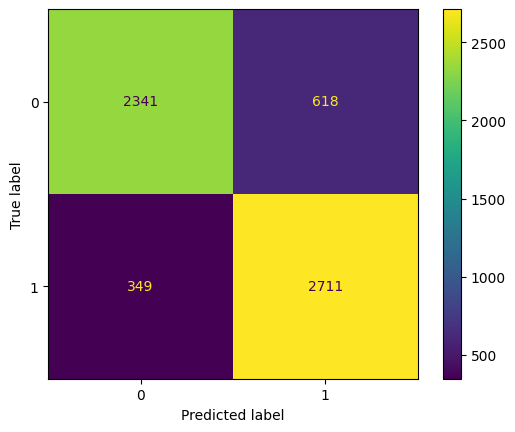

In [291]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [292]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      2959
           1       0.81      0.89      0.85      3060

    accuracy                           0.84      6019
   macro avg       0.84      0.84      0.84      6019
weighted avg       0.84      0.84      0.84      6019



## Conclusion for classification


*   A rating is considered high if it is above 4.0 (in a range of 0 - 5)
*   In order to predict whether or not the rating would be high, I used the Logistic Regression Model
*   After balancing the dataset, the model was able to predict high rating with 84% accuracy.

